In [40]:
# installing and importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Creating folder structure
root_folder = "ds_shashank"
os.makedirs(f"{root_folder}/csv_files", exist_ok=True)
os.makedirs(f"{root_folder}/outputs", exist_ok=True)

# Loading datasets
trader_df = pd.read_csv(f"{root_folder}/csv_files/historical_data.csv")
sentiment_df = pd.read_csv(f"{root_folder}/csv_files/fear_greed_index.csv")

# Quick look of the data
print("Trader Data:")
display(trader_df.head())

print("\nSentiment Data:")
display(sentiment_df.head())

# Standardize column names (lowercase, replace spaces with underscores)
trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(' ', '_')

#  Parse dates
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

#  Remove missing dates (if any)
trader_df = trader_df.dropna(subset=['timestamp_ist'])
sentiment_df = sentiment_df.dropna(subset=['date'])

# Save cleaned data
trader_df.to_csv(f"{root_folder}/csv_files/trader_data_clean.csv", index=False)
sentiment_df.to_csv(f"{root_folder}/csv_files/fear_greed_clean.csv", index=False)

print("\n Data loaded & cleaned successfully!")

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



 Data loaded & cleaned successfully!


In [41]:
# Merging datasets

trader_df['date'] = trader_df['timestamp_ist'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Ensure sentiment_df['date'] is datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Merge trader and sentiment data on date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')

print("Merged Data Preview:")
display(merged_df.head())

# Check how many rows have sentiment labels
print("\nSentiment label counts:")
print(merged_df['classification'].value_counts(dropna=False))

# Saving merged dataset
merged_df.to_csv(f"{root_folder}/csv_files/merged_trader_sentiment.csv", index=False)

print("\n Datasets merged successfully!")


Merged Data Preview:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed



Sentiment label counts:
classification
NaN              43361
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

 Datasets merged successfully!


/tmp/ipython-input-2113275772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged_df, palette='coolwarm')


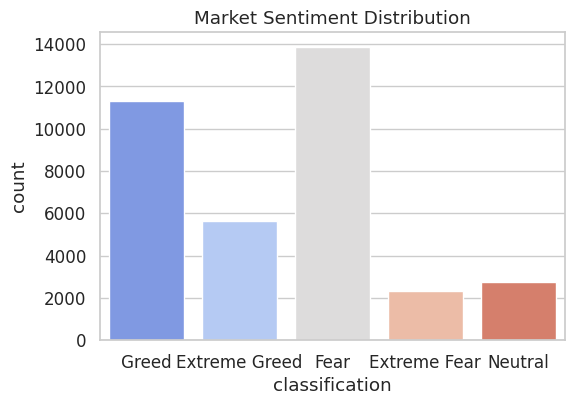

In [42]:
# EDA
# Distribution of Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=merged_df, palette='coolwarm')
plt.title("Market Sentiment Distribution")
plt.savefig(f"{root_folder}/outputs/sentiment_distribution.png", bbox_inches='tight')
plt.show()

/tmp/ipython-input-3030528072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='size_tokens', data=merged_df, palette='coolwarm', errorbar=None)


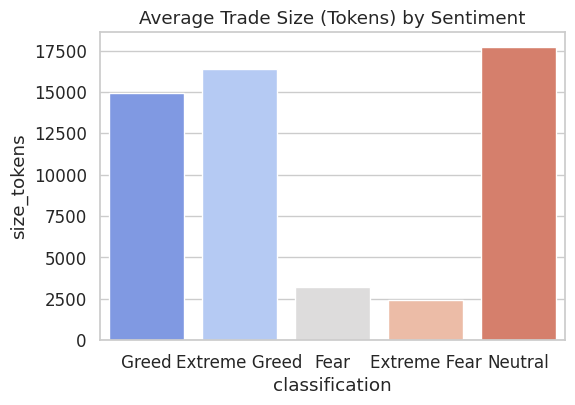

In [43]:
# Average Trade Size (Tokens) by Sentiment
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='size_tokens', data=merged_df, palette='coolwarm', errorbar=None)
plt.title("Average Trade Size (Tokens) by Sentiment")
plt.savefig(f"{root_folder}/outputs/avg_trade_tokens.png", bbox_inches='tight')
plt.show()

/tmp/ipython-input-4039067387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='closed_pnl', data=merged_df, palette='coolwarm')


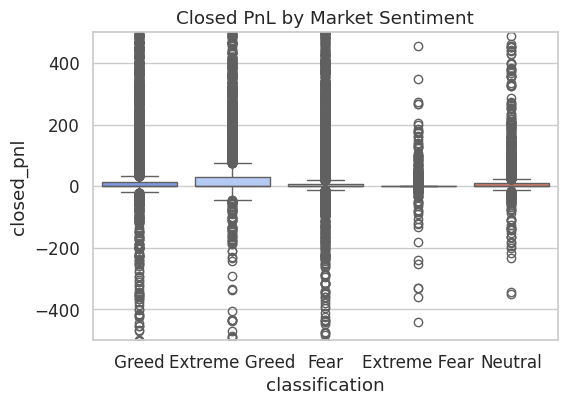

In [44]:
# Profitability (closedPnL) Distribution by Sentiment
plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='closed_pnl', data=merged_df, palette='coolwarm')
plt.title("Closed PnL by Market Sentiment")
plt.ylim(-500, 500)  # optional: limit outlier effect
plt.savefig(f"{root_folder}/outputs/pnl_distribution.png", bbox_inches='tight')
plt.show()

/tmp/ipython-input-219468045.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='classification', y='size_usd', data=merged_df, palette='coolwarm', ci=None)
/tmp/ipython-input-219468045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='size_usd', data=merged_df, palette='coolwarm', ci=None)


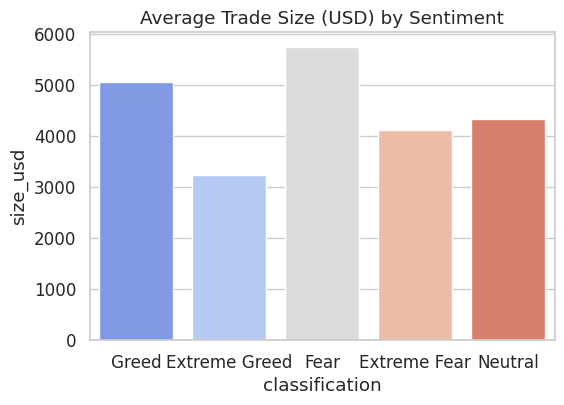

In [45]:
# Trade Size vs Sentiment
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='size_usd', data=merged_df, palette='coolwarm', ci=None)
plt.title("Average Trade Size (USD) by Sentiment")
plt.savefig(f"{root_folder}/outputs/trade_size.png", bbox_inches='tight')
plt.show()

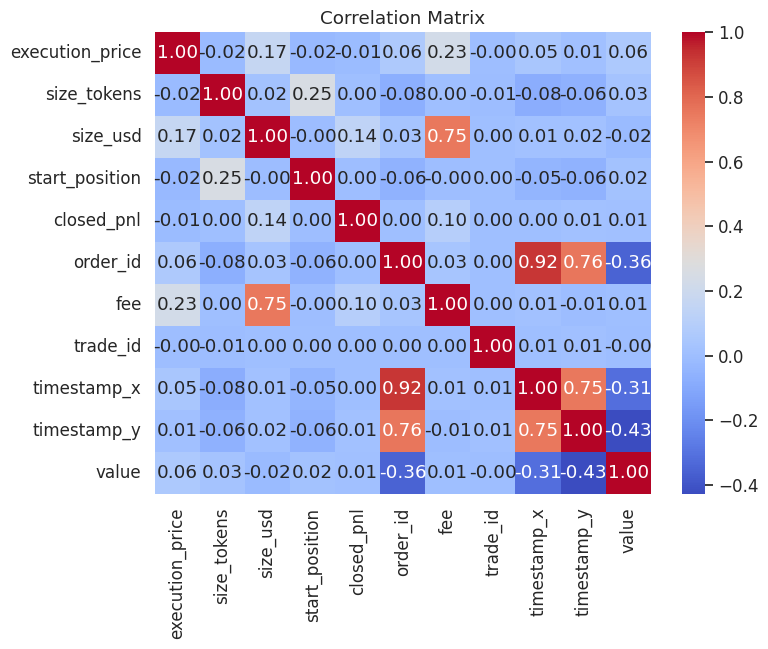


 EDA complete! All charts saved in outputs/ folder.


In [46]:
# Correlation Heatmap for numeric features
plt.figure(figsize=(8,6))
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig(f"{root_folder}/outputs/correlation_matrix.png", bbox_inches='tight')
plt.show()

print("\n EDA complete! All charts saved in outputs/ folder.")

Listing contents of: ds_shashank/csv_files
